# <center>Image Processing Project</center>

- Sinh viên: Phan Thanh An
- Mã số sinh viên: 21127003
- Lớp: 21CLC07

## Mục lục
* [1. Import các thư viện được phép sử dụng](#c1)
* [2. Implement ImageProcessor Class](#c2)
    * [2.1. ChangeBrightness Class](#c21)
    * [2.2. ChangeContrast Class](#c22)
    * [2.3. FlipImage Class](#c23)
    * [2.4. GrayScaleImage Class](#c24)
* [3. Các function phụ trợ cho chương trình main](#c3)
* [4. Chương trình main](#c4)

## <a class="anchor" id="c1">1. Import các thư viện được phép sử dụng</a>

In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## <a class="anchor" id="c2">2. Implement ImageProcessor class</a>

Class ImageProcessor được cài để phục vụ cho việc đọc ảnh và thiết lập thông số ```cmap``` dùng để hiển thị ảnh thông ```imshow``` của ```matplotlib.pyplot```. Ngoài ra class này còn được dùng để cài đặt một số function thông dụng như:
- ```compare_images(self, new_img, title="")```: dùng để hiển thị đồng thời ảnh gốc và ảnh mới được ra để so sánh
- ```save_image(self, img, name)```: dùng để lưu ảnh với ```file_name``` là tham số

In [32]:
class ImageProcessor:
    def __init__(self, img, cmp='viridis'):
        '''
        Initialize ImageProcessor with an input image.

        Inputs:
          img : PngImageFile or Image object
            Original image in PNG format
        '''
        # Convert PIL Image to NumPy array
        if not isinstance(img, np.ndarray):
            img = np.array(img)

        self.img = img
        self.cmp = cmp

    def compare_images(self, new_img, title=""):
        '''
        Compare the original image with a new image side by side.

        Inputs:
          new_img : np.ndarray
            New image to be shown on the right side for comparison
          title : str
            Title for the figure (optional)
        Outputs:
          None (Displays the comparison plot using matplotlib)
        '''
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(title, fontsize=16)

        ax1.imshow(self.img)
        ax1.set_title("Before")

        ax2.imshow(new_img, cmap=self.cmp)

        ax2.set_title("After")
        plt.show()
        
    def save_image(self, img, file_name):
        save_img = Image.fromarray(img.astype('uint8'))
        save_img.save("output/" + file_name)

### <a class="anchor" id="c21">2.1. ChangeBrightness Class</a>

In [33]:
class ChangeBrightness(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)

    def change_brightness(self, factor):
        '''
        Change brightness of the image by a specific factor.

        Inputs:
          factor : float
            Factor by which you want to change brightness (should be > 0)

        Outputs:
          new_img : np.ndarray
            Image after changing its brightness
        '''
        new_img = self.img * factor
        new_img = np.maximum(np.minimum(self.img * factor, 255), 0).astype(np.uint8)
        return new_img

### <a class="anchor" id="c22">2.2. ChangeContrast Class</a>

In [34]:
class ChangeContrast(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)

    def change_contrast(self, factor):
        '''
        Change contrast of the image by a specific factor.

        Inputs:
          factor : float
            Factor by which you want to change contrast (should be > 0)

        Outputs:
          new_img : np.ndarray
            Image after changing its contrast
        '''
        new_img = (self.img - np.mean(self.img)) * factor + np.mean(self.img)
        new_img = np.clip(new_img, 0, 255).astype(np.uint8)
        return new_img

### <a class="anchor" id="c23">2.3. FlipImage Class</a>

In [35]:
class FlipImage(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)


    def flip_image(self, mode="horizontal"):
        '''
        Flip the image horizontally or vertically.

        Inputs:
          mode : str
            Flip mode, "horizontal" or "vertical" (default="horizontal")

        Outputs:
          new_img : np.ndarray
            Flipped image
        '''
        if mode == "horizontal":
            new_img = np.fliplr(self.img) # flipped horizontally (left to right)
        elif mode == "vertical":
            new_img = np.flipud(self.img) # flipped vertically (upside down
        else:
            raise ValueError("Invalid flip mode. Use 'horizontal' or 'vertical'.")

        return new_img

### <a class="anchor" id="c24">2.4. GrayScaleImage Class</a>

In [36]:
class GrayScaleImage(ImageProcessor):
    def __init__(self, img, cmp='gray'):
        ImageProcessor.__init__(self, img, cmp)
    
    def to_grayscale(self):
        '''
        Convert the image to grayscale.

        Outputs:
          grayscale_img : np.ndarray
            Grayscale version of the image
        '''
        if len(self.img.shape) == 3 and self.img.shape[2] == 3:
            # Convert RGB to grayscale using luminance formula
            grayscale_img = np.dot(self.img[..., :3], [0.2989, 0.5870, 0.1140])
        else:
            raise ValueError("The input image is not in RGB format.")

        return grayscale_img.astype(np.uint8)

In [37]:
class SebiaImage(ImageProcessor):
    def __init__(self, img):
        ImageProcessor.__init__(self, img)
    
    def to_sebia(self):
        '''
        Convert image from rgb to sebia image
        Inputs:
            img : np.ndarray
            Original image in ndarray format
        Outputs:
            new_img : np.ndarray
            Image after being converted into sebia
          '''
        # https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image
        tr = np.dot(self.img,  [0.393, 0.769, 0.189])
        tg = np.dot(self.img,  [0.349, 0.686, 0.168])
        tb = np.dot(self.img,  [0.272, 0.534, 0.131])
        new_img = np.clip(np.dstack((tr, tg, tb)), 0, 255).astype(int)
        return new_img

In [38]:
class BlurImage(ImageProcessor):
    def __init__(self, img, cmp='gray'):
        ImageProcessor.__init__(self, img, cmp)
        
    def blur_image(self):
        '''
        Blur image using a box blur kernel.

        Inputs:
          img : np.ndarray
            Original image in ndarray format

        Outputs:
          new_img : np.ndarray
            Image after being blurred
        '''
        # Define the box blur kernel
        kernel = (1 / 9) * np.ones((3, 3))  # 3x3 kernel with equal weights

        # Reshape the kernel to ensure consistent dimensions
        if kernel.ndim == 2:
            kernel = np.reshape(kernel, kernel.shape + (1,))

        # Determine kernel dimensions and padding
        kernel_height, kernel_width = kernel.shape[:2]
        pad_height, pad_width = kernel_height // 2, kernel_width // 2

        # Get the dimensions of the input image
        img_h, img_w = self.img.shape[:2]

        # Pad the image to handle border pixels using the "wrap" mode
        padded_img = np.pad(self.img, [(pad_height, pad_height), (pad_width, pad_width), (0, 0)], mode='wrap')

        # Create an empty array for the blurred image
        new_img = np.zeros(self.img.shape)

        # Iterate through each pixel in the image
        for y in range(img_h):
            for x in range(img_w):
                # Extract the local window around the pixel
                window = padded_img[y: y + kernel_height, x: x + kernel_width]

                # Compute the weighted sum of pixel values using the kernel
                new_pixel = np.sum(window * kernel, axis=(0, 1))

                # Assign the computed value to the corresponding pixel in the new image
                new_img[y][x] = new_pixel

        # Convert the blurred image to integers
        return new_img.astype(int)

##  <a class="anchor" id="c3">3. Các function phụ trợ cho chương trình ```main```</a>

In [39]:
def change_brightness(img_path):
    img = Image.open(img_path)
    
    process = ChangeBrightness(img)
    brightness_img = process.change_brightness(1.5)
    output_name = img_path.rsplit('.', 1)[0] + "_brightness.png"
    process.save_image(brightness_img, output_name)
    process.compare_images(brightness_img, 'Change Brightness')
    print("Ảnh được lưu ở", "output/" + output_name)

In [40]:
def change_contrast(img_path):
    img = Image.open(img_path)
    
    process = ChangeContrast(img)
    contrast_img = process.change_contrast(1.8)
    output_name = img_path.rsplit('.', 1)[0] + "_contrast.png"
    process.save_image(contrast_img, output_name)
    process.compare_images(contrast_img, 'Change Contrast')
    print("Ảnh được lưu ở", "output/" + output_name)

In [41]:
def flip_image(img_path, enable_choice=True):
    img = Image.open(img_path)
    choice = 1
    if enable_choice:
        choice = int(input("""Nhập lựa chọn: 
                        \n 1. Lật ngang
                        \n 2. Lật dọc\n Lựa chọn: """))
    
    process = FlipImage(img)
    
    if enable_choice == False:
        flip_img = process.flip_image(mode="horizontal")
        output_name = img_path.rsplit('.', 1)[0] + "_flip_horizontal.png"
        process.save_image(flip_img, output_name)
        process.compare_images(flip_img, 'Flip Horizontal')
        print("Ảnh được lưu ở", "output/" + output_name)
        
        flip_img = process.flip_image(mode="vertical")
        output_name = img_path.rsplit('.', 1)[0] + "_flip_vertical.png"
        process.save_image(flip_img, output_name)
        process.compare_images(flip_img, 'Flip Vertical')
        print("Ảnh được lưu ở", "output/" + output_name)
    elif enable_choice == True:
        if choice == 1:
            flip_img = process.flip_image(mode="horizontal")
            output_name = img_path.rsplit('.', 1)[0] + "_flip_horizontal.png"
            process.save_image(flip_img, output_name)
            process.compare_images(flip_img, 'Flip Horizontal')
            print("Ảnh được lưu ở", "output/" + output_name)

        elif choice == 2:
            flip_img = process.flip_image(mode="vertical")
            output_name = img_path.rsplit('.', 1)[0] + "_flip_vertical.png"
            process.save_image(flip_img, output_name)
            process.compare_images(flip_img, 'Flip Vertical')
            print("Ảnh được lưu ở", "output/" + output_name)

In [42]:
def gray_scale_image(img_path):
    img = Image.open(img_path)
    
    process = GrayScaleImage(img)
    grayscale_img = process.to_grayscale()
    output_name = img_path.rsplit('.', 1)[0] + "_grayscale.png"
    process.save_image(grayscale_img, output_name)
    process.compare_images(grayscale_img, 'Gray Scale')
    print("Ảnh được lưu ở", "output/" + output_name)

In [43]:
def sebia_image(img_path):
    img = Image.open(img_path)
    
    process = SebiaImage(img)
    sebia_img = process.to_sebia()
    output_name = img_path.rsplit('.', 1)[0] + "_sebia.png"
    process.save_image(sebia_img, output_name)
    process.compare_images(sebia_img, 'Sebia')
    print("Ảnh được lưu ở", "output/" + output_name)

In [44]:
def blur_image(img_path):
    img = Image.open(img_path)
    
    process = BlurImage(img)
    blur_img = process.blur_image()
    output_name = img_path.rsplit('.', 1)[0] + "_blur.png"
    process.save_image(blur_img, output_name)
    process.compare_images(blur_img, 'blur')
    print("Ảnh được lưu ở", "output/" + output_name)

##  <a class="anchor" id="c4">4. Chương trình ```main```</a>

Nhập vào đường dẫn ảnh (vd: penguin.png): penguin.png

Nhập lựa chọn: 
                            
 0. Chạy tất cả chức năng
                            
 1. Thay đổi độ sáng cho ảnh
                            
 2. Thay đổi độ tương phản
                            
 3. Lật ảnh (ngang - dọc)
                            
 4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
                            
 5. Làm mờ/sắc nét ảnh
                            
 6. Cắt ảnh theo kích thước (cắt ở trung tâm)
                            
 7. Cắt ảnh theo khung hình tròn
                            
 Lựa chọn: 0


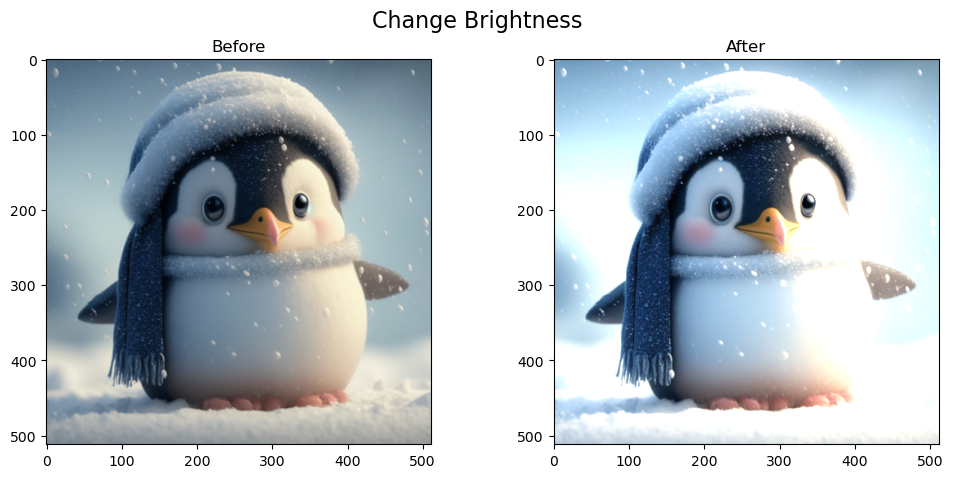

Ảnh được lưu ở output/penguin_brightness.png


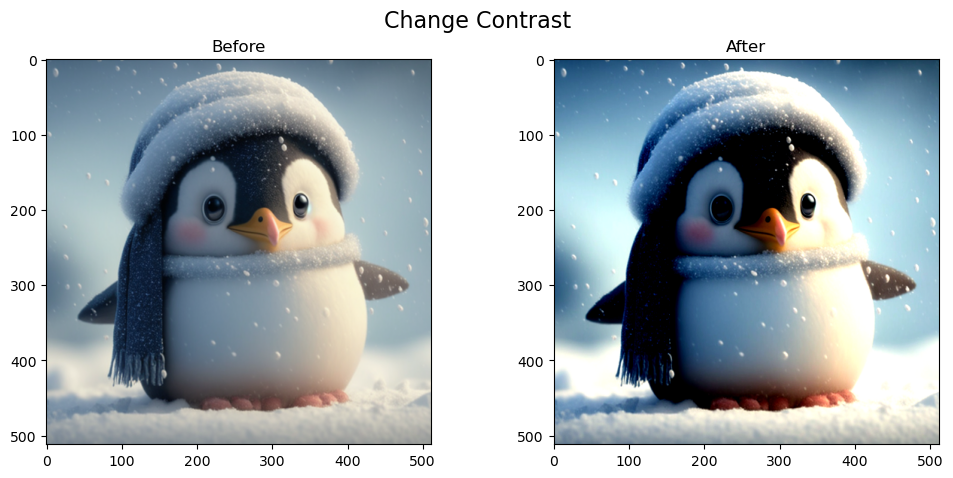

Ảnh được lưu ở output/penguin_contrast.png


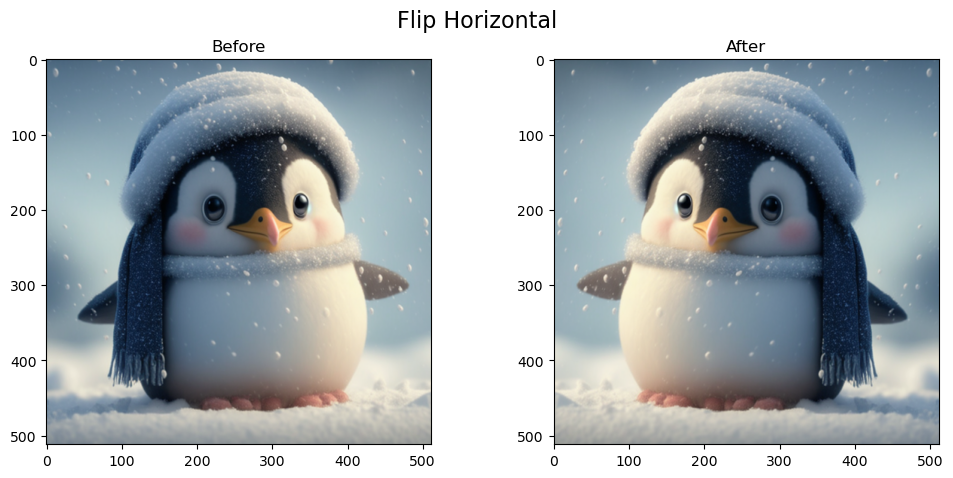

Ảnh được lưu ở output/penguin_flip_horizontal.png


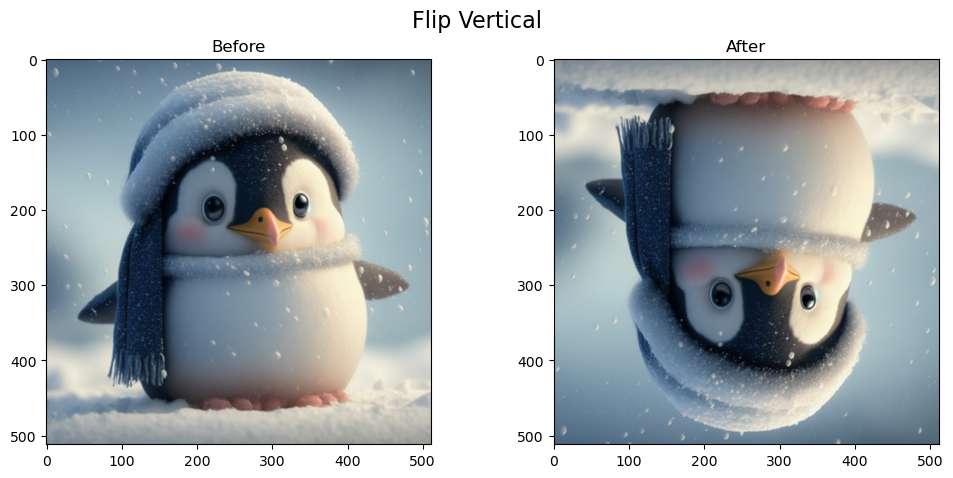

Ảnh được lưu ở output/penguin_flip_vertical.png


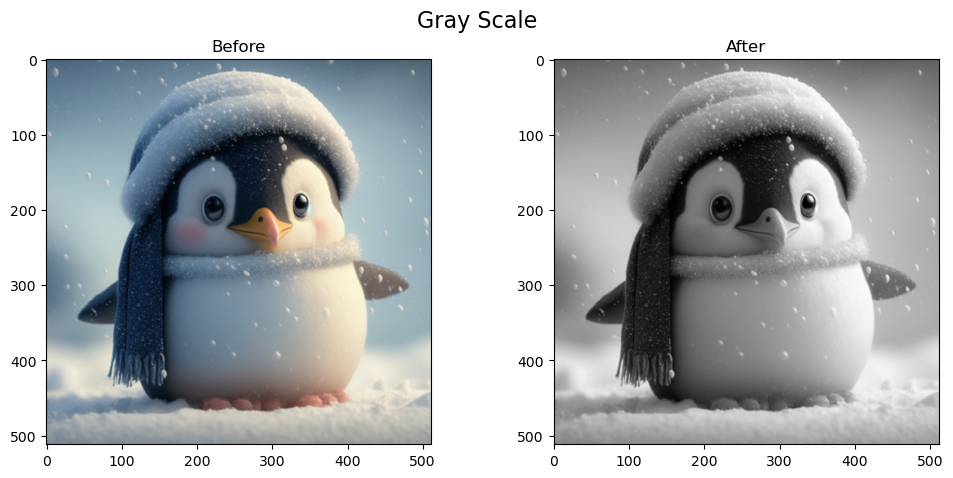

Ảnh được lưu ở output/penguin_grayscale.png


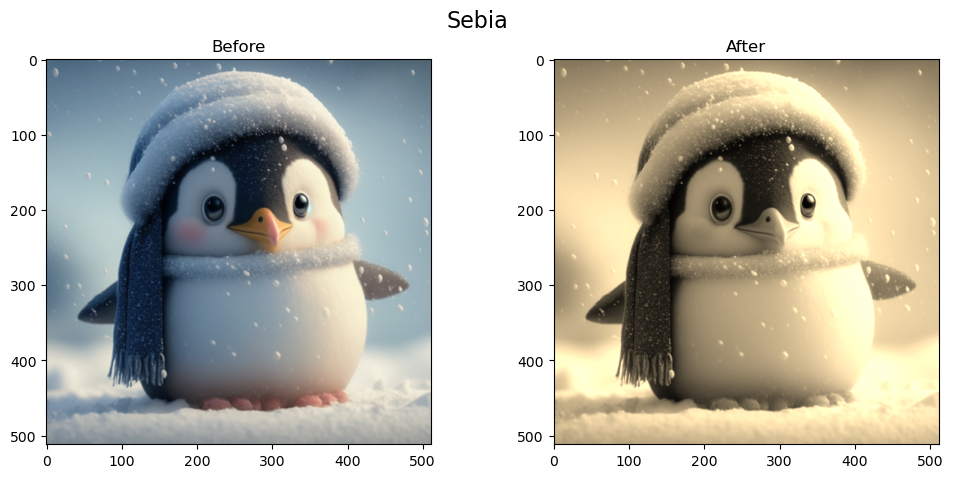

Ảnh được lưu ở output/penguin_sebia.png


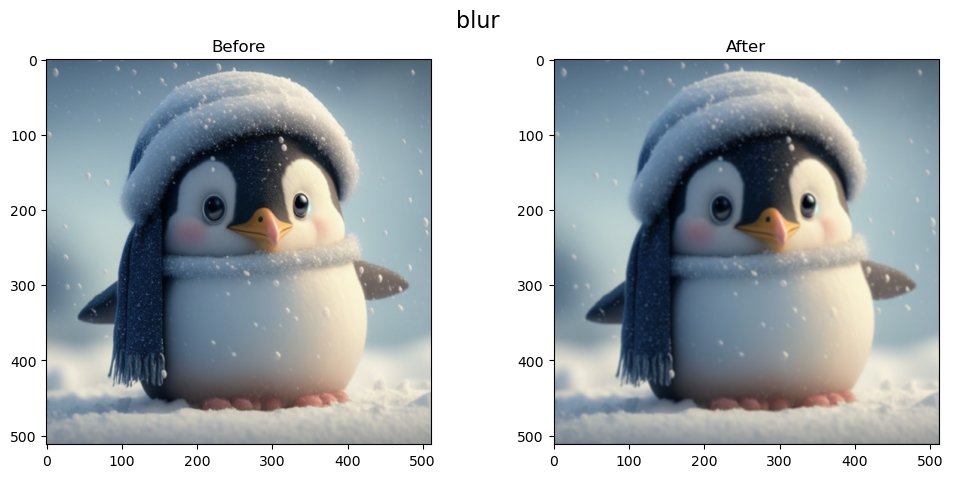

Ảnh được lưu ở output/penguin_blur.png


In [45]:
if __name__ == "__main__":
    img_path = input("Nhập vào đường dẫn ảnh (vd: penguin.png): ")
    try:
        choice = int(input("""\nNhập lựa chọn: 
                            \n 0. Chạy tất cả chức năng
                            \n 1. Thay đổi độ sáng cho ảnh
                            \n 2. Thay đổi độ tương phản
                            \n 3. Lật ảnh (ngang - dọc)
                            \n 4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
                            \n 5. Làm mờ/sắc nét ảnh
                            \n 6. Cắt ảnh theo kích thước (cắt ở trung tâm)
                            \n 7. Cắt ảnh theo khung hình tròn
                            \n Lựa chọn: """))
        
        if choice == 0:
            change_brightness(img_path)
            change_contrast(img_path)
            flip_image(img_path, enable_choice=False)
            gray_scale_image(img_path)
            sebia_image(img_path)
            blur_image(img_path)
        elif choice == 1:
            change_brightness(img_path)
        elif choice == 2:
            change_contrast(img_path)
        elif choice == 3:
            flip_image(img_path)
        elif choice == 4:
            gray_scale_image(img_path)
            sebia_image(img_path)
        elif choice == 5:
            blur_image(img_path)
    except:
        raise SystemExit("Đường dẫn không hợp lệ")
